In [281]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [282]:
url = "data/Titanic.csv"

In [283]:
df = pd.read_csv(url, sep=',')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [285]:
# mean age
print('Mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('Median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

Mean of "Age" is 29.88
Median of "Age" is 28.00


In [286]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Embarked"] = df["Embarked"].fillna("S")


In [287]:
#df["HasCabin"] = df.Cabin.isnull() -> Hascabin er satt til true for passasjerer som ikke har cabin, isnull() returnerer true hvis verdien er NaN.
df["HasCabin"] = df["Cabin"].notnull() #True hvis de har en verdi i "Cabin"-kolonnen, og False hvis de ikke har det), må du bruke notnull() i stedet for isnull()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [288]:
lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)
df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr


In [289]:
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [290]:
df["Title"] = df["Title"].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df["Title"] = df["Title"].replace(["Don","Dona", "Rev", "Dr", "Major", "Lady", "Sir", "Col", "Capt", "Countess", "Jonkheer"], "Unique")

In [291]:
df["Title"].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Unique     29
Name: count, dtype: int64

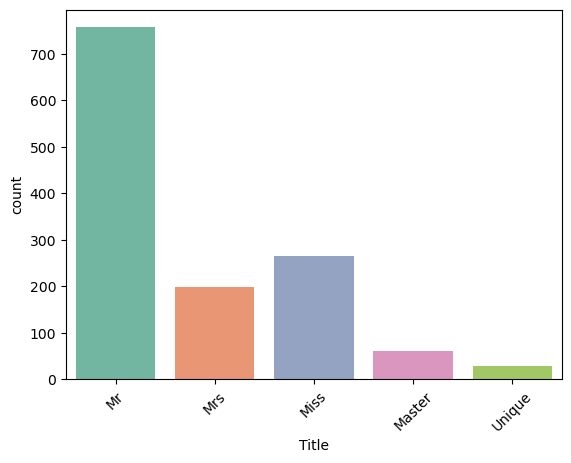

In [292]:
sns.countplot(x='Title', data=df, hue="Title", palette="Set2"); #Seaborn countplot
plt.xticks(rotation=45);

In [293]:
df['CatAge'] = pd.qcut(df["Age"], q=4, labels=False )
df['CatFare'] = pd.qcut(df["Fare"], q=4, labels=False )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


In [294]:
#Dropping columns that wont make sense in binary format
df = df.drop(["Age", "Fare", "Cabin", "Name", "Ticket"], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,male,1,0,S,False,Mr,0,0
1,2,1.0,1,female,1,0,C,True,Mrs,3,3
2,3,1.0,3,female,0,0,S,False,Miss,1,1
3,4,1.0,1,female,1,0,S,True,Mrs,2,3
4,5,0.0,3,male,0,0,S,False,Mr,2,1


In [295]:
# Converting to binary values
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [296]:
df_dum.to_csv('data/Titanic_Cleaned.csv', index=False)